**Name - Tanisha Bansal**

**Enrollment No. - 14301172022**

**Assignment - 01**

**Batch: CSE-AI - 2, 2026**

In [1]:
# Importing all the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
# Step 1: Load the dataset
print("Loading dataset...")
penguins = sns.load_dataset('penguins')
if penguins is not None:
    print("Dataset loaded successfully.")
    print(penguins.head())
else:
    raise ValueError("Failed to load dataset.")

Loading dataset...
Dataset loaded successfully.
  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  


In [6]:
# Step 2: Data Cleaning
print("\nInitial dataset shape:", penguins.shape)
print("\nColumns with missing values:\n", penguins.isnull().sum())


Initial dataset shape: (344, 9)

Columns with missing values:
 bill_length_mm       2
bill_depth_mm        2
flipper_length_mm    2
body_mass_g          2
species_Chinstrap    0
species_Gentoo       0
island_Dream         0
island_Torgersen     0
sex_Male             0
dtype: int64


In [3]:
# Step 3: Normalization of Continuous Features
scaler = StandardScaler()
continuous_features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
penguins[continuous_features] = scaler.fit_transform(penguins[continuous_features])

In [4]:
# Step 4: Preprocessing Categorical Features
penguins = pd.get_dummies(penguins, columns=['species', 'island', 'sex'], drop_first=True)

In [5]:
# Step 5: Data Transformation
X = penguins.drop(columns=['body_mass_g'])  # Features
y = penguins['body_mass_g']  # Target

In [15]:
from sklearn.impute import SimpleImputer

# Handle missing values
imputer = SimpleImputer(strategy='mean')  # Replace NaN with the mean of the column
X_imputed = imputer.fit_transform(X)

# Polynomial Feature Expansion
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_imputed)

print("Polynomial features generated successfully.")



Polynomial features generated successfully.


In [21]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)
print("\nTraining and testing datasets created.")


Training and testing datasets created.


In [23]:

# Step 6: Applying Multiple Regression Models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Decision Tree": DecisionTreeRegressor(max_depth=5, random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}


In [25]:

print(f"Number of NaN values in target variable y: {y.isnull().sum()}")

non_nan_indices = y.notnull()
X = X[non_nan_indices]  # Keep only rows where y is not NaN
y = y[non_nan_indices]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Number of NaN values in target variable y: 2


In [26]:
results = []

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluation Metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append((name, mse, r2))
    print(f"{name} - Mean Squared Error (MSE): {mse:.2f}, R-squared (R²): {r2:.2f}")


Training Linear Regression...
Linear Regression - Mean Squared Error (MSE): 0.13, R-squared (R²): 0.88

Training Ridge Regression...
Ridge Regression - Mean Squared Error (MSE): 0.12, R-squared (R²): 0.88

Training Lasso Regression...
Lasso Regression - Mean Squared Error (MSE): 0.24, R-squared (R²): 0.77

Training Decision Tree...
Decision Tree - Mean Squared Error (MSE): 0.15, R-squared (R²): 0.85

Training Random Forest...
Random Forest - Mean Squared Error (MSE): 0.17, R-squared (R²): 0.84


In [27]:
# Step 7: Results Comparison
results_df = pd.DataFrame(results, columns=['Model', 'MSE', 'R2'])
print("\nRegression Model Comparison:")
print(results_df)


Regression Model Comparison:
               Model       MSE        R2
0  Linear Regression  0.128165  0.876397
1   Ridge Regression  0.122127  0.882220
2   Lasso Regression  0.240781  0.767789
3      Decision Tree  0.151461  0.853930
4      Random Forest  0.169185  0.836837


<ipython-input-28-75b30a52f869>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x='Model', y='MSE', palette='coolwarm')


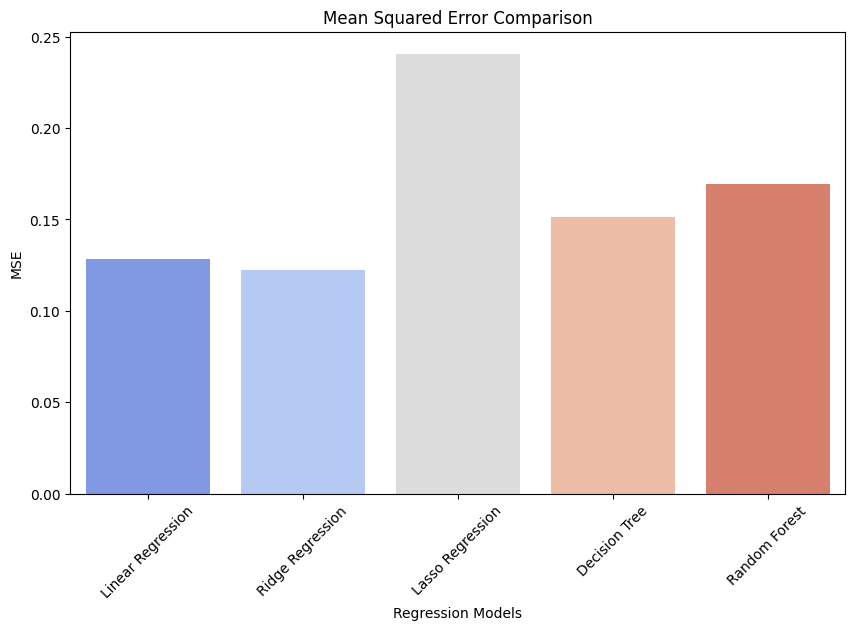

In [28]:
# Step 8: Visualization
# Bar plot for MSE
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x='Model', y='MSE', palette='coolwarm')
plt.title('Mean Squared Error Comparison')
plt.ylabel('MSE')
plt.xlabel('Regression Models')
plt.xticks(rotation=45)
plt.show()

<ipython-input-29-4a83f3b42815>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x='Model', y='R2', palette='viridis')


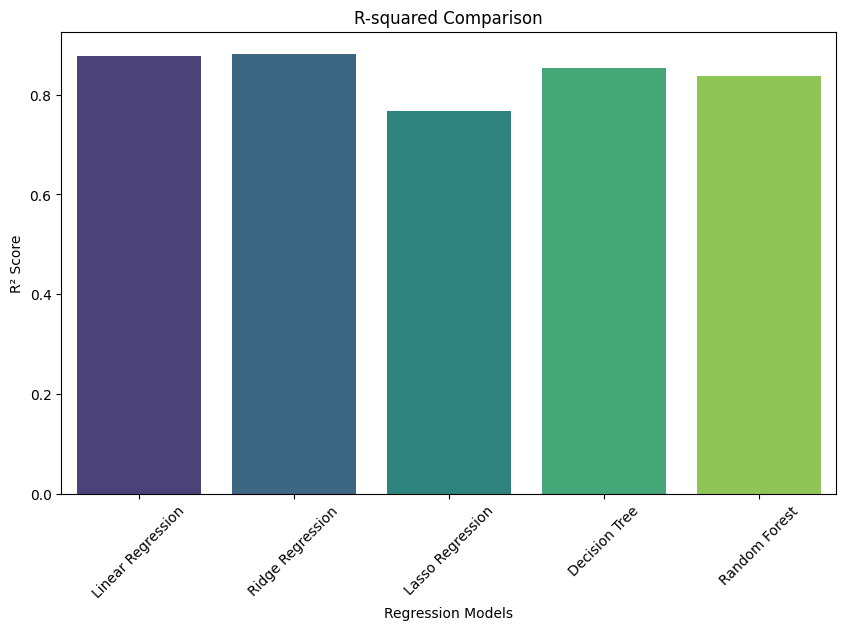

In [29]:
# Bar plot for R-squared
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x='Model', y='R2', palette='viridis')
plt.title('R-squared Comparison')
plt.ylabel('R² Score')
plt.xlabel('Regression Models')
plt.xticks(rotation=45)
plt.show()


Best performing model: Ridge Regression


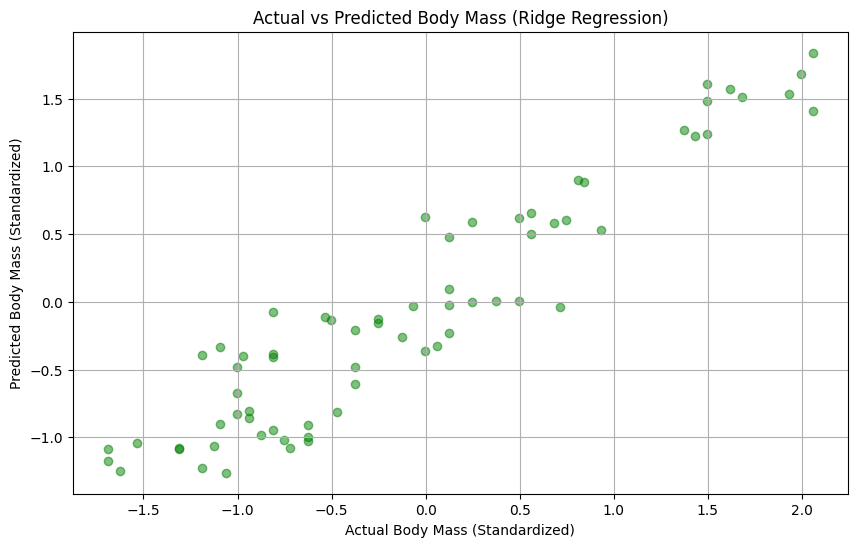

In [30]:
# Scatter plot for best model predictions
best_model_name = results_df.loc[results_df['R2'].idxmax(), 'Model']
print(f"\nBest performing model: {best_model_name}")
best_model = models[best_model_name]
best_y_pred = best_model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, best_y_pred, alpha=0.5, color='green')
plt.title(f'Actual vs Predicted Body Mass ({best_model_name})')
plt.xlabel('Actual Body Mass (Standardized)')
plt.ylabel('Predicted Body Mass (Standardized)')
plt.grid(True)
plt.show()

In [32]:
#Conclusion
print("\nThe program successfully trained multiple regression models, evaluated their performance, and visualized the results.")


The program successfully trained multiple regression models, evaluated their performance, and visualized the results.
